<a href="https://colab.research.google.com/github/fiqhrimuliandaputra/DSTraining/blob/main/Jawaban_Tugas_2_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Decision Trees

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from 

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Downloading Data


now, read data using pandas dataframe:

In [ ]:
data1 = pd.read_csv("dataispujkt2017.csv", delimiter=",")
data1[0:5]

,pm10,so2,co,o3,no2,kategori
0,63.0,34.0,25.0,21.0,2.0,SEDANG
1,16.0,32.0,16.0,19.0,1.0,BAIK
2,18.0,32.0,17.0,20.0,2.0,BAIK
3,24.0,32.0,22.0,20.0,2.0,BAIK
4,29.0,32.0,25.0,14.0,2.0,BAIK


In [ ]:
data1.shape

(1801, 6)

In [ ]:
data1.dtypes

pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
kategori     object
dtype: object

In [ ]:
data1.isnull().sum()

pm10        72
so2         33
co          53
o3          49
no2         45
kategori     0
dtype: int64

In [ ]:
data2 = pd.read_csv("dataispujkt2018.csv", delimiter=",")
data2[0:5]

,pm10,so2,co,o3,no2,kategori
0,35.0,20.0,22.0,27.0,2.0,BAIK
1,14.0,18.0,12.0,17.0,1.0,BAIK
2,24.0,21.0,20.0,19.0,2.0,BAIK
3,23.0,19.0,17.0,21.0,2.0,BAIK
4,18.0,19.0,14.0,24.0,2.0,BAIK


In [ ]:
data2.shape

(1788, 6)

In [ ]:
data2.dtypes

pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
kategori     object
dtype: object

In [ ]:
data2.isnull().sum()

pm10        26
so2         36
co          30
o3          71
no2         77
kategori     0
dtype: int64

#Menggabungkan 2 data frame

In [ ]:
frames = [data1, data2] 
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

In [ ]:
result.to_csv(r'Datagabung.csv', index=False)

In [ ]:
my_data = pd.read_csv('/content/Datagabung.csv')
my_data.head()

,pm10,so2,co,o3,no2,kategori
0,63.0,34.0,25.0,21.0,2.0,SEDANG
1,16.0,32.0,16.0,19.0,1.0,BAIK
2,18.0,32.0,17.0,20.0,2.0,BAIK
3,24.0,32.0,22.0,20.0,2.0,BAIK
4,29.0,32.0,25.0,14.0,2.0,BAIK


In [ ]:
my_data.shape

(3587, 6)

In [ ]:
my_data.dtypes

pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
kategori     object
dtype: object

In [ ]:
my_data.isnull().sum()

pm10         97
so2          69
co           83
o3          120
no2         121
kategori      0
dtype: int64

In [ ]:
my_data.isna().sum()

pm10         97
so2          69
co           83
o3          120
no2         121
kategori      0
dtype: int64

## Pre-processing

In [ ]:
my_data['pm10'].fillna(my_data['pm10'].mean(), inplace=True)
my_data['so2'].fillna(my_data['so2'].mean(), inplace=True)

In [ ]:
my_data.isnull().sum()

pm10          0
so2           0
co           83
o3          120
no2         121
kategori      0
dtype: int64

In [ ]:
#mengilangkan missing values dnegan mengganti nilai menjadi 0
my_data = my_data.fillna(0)

In [ ]:
my_data.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
kategori    0
dtype: int64

In [ ]:
#
my_data.fillna(method='ffill')

,pm10,so2,co,o3,no2,kategori
0,63.000000,34.000000,25.0,21.0,2.0,SEDANG
1,16.000000,32.000000,16.0,19.0,1.0,BAIK
2,18.000000,32.000000,17.0,20.0,2.0,BAIK
3,24.000000,32.000000,22.0,20.0,2.0,BAIK
4,29.000000,32.000000,25.0,14.0,2.0,BAIK
...,...,...,...,...,...,...
3582,6.000000,2.000000,8.0,48.0,0.0,BAIK
3583,50.123782,1.000000,7.0,40.0,0.0,BAIK
3584,50.123782,23.392268,6.0,49.0,0.0,BAIK
3585,50.123782,23.392268,6.0,51.0,0.0,SEDANG


In [ ]:
# Langkah 1
my_data_pm10 = my_data
# Langkah 2
rata_pm10 = my_data_pm10['pm10'].mean()
# Langkah 3
my_data_pm10['pm10'] = my_data_pm10['pm10'].fillna(rata_pm10)
# Langkah 4
my_data_pm10['pm10'].isna().sum()

0

In [ ]:
# Langkah 1
my_data_so2 = my_data
# Langkah 2
rata_so2 = my_data_so2['so2'].mean()
# Langkah 3
my_data_so2['so2'] = my_data_pm10['so2'].fillna(rata_so2)
# Langkah 4
my_data_so2['so2'].isna().sum()

0

In [ ]:
# Langkah 1
my_data_co = my_data
# Langkah 2
rata_co = my_data_co['co'].mean()
# Langkah 3
my_data_co['co'] = my_data_co['co'].fillna(rata_co)
# Langkah 4
my_data_co['co'].isna().sum()

0

In [ ]:
# Langkah 1
my_data_no2 = my_data
# Langkah 2
rata_no2 = my_data_pm10['no2'].mean()
# Langkah 3
my_data_no2['no2'] = my_data_no2['no2'].fillna(rata_no2)
# Langkah 4
my_data_no2['no2'].isna().sum()

0

In [ ]:
# Langkah 1
my_data_o3 = my_data
# Langkah 2
rata_o3 = my_data_o3['o3'].mean()
# Langkah 3
my_data_o3['o3'] = my_data_o3['o3'].fillna(rata_o3)
# Langkah 4
my_data_o3['o3'].isna().sum()

0

In [ ]:
my_data.isna().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
kategori    0
dtype: int64

In [ ]:
my_data.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
kategori    0
dtype: int64

In [ ]:
my_data[0:100]

,pm10,so2,co,o3,no2,kategori
0,63.0,34.0,25.0,21.0,2.0,SEDANG
1,16.0,32.0,16.0,19.0,1.0,BAIK
2,18.0,32.0,17.0,20.0,2.0,BAIK
3,24.0,32.0,22.0,20.0,2.0,BAIK
4,29.0,32.0,25.0,14.0,2.0,BAIK
...,...,...,...,...,...,...
95,23.0,7.0,14.0,31.0,1.0,BAIK
96,46.0,8.0,20.0,55.0,6.0,SEDANG
97,43.0,7.0,23.0,73.0,4.0,SEDANG
98,39.0,9.0,26.0,47.0,5.0,BAIK


In [ ]:
X = my_data[['pm10', 'so2', 'co', 'o3', 'no2']].values
X[0:5]

array([[63., 34., 25., 21.,  2.],
       [16., 32., 16., 19.,  1.],
       [18., 32., 17., 20.,  2.],
       [24., 32., 22., 20.,  2.],
       [29., 32., 25., 14.,  2.]])

In [ ]:
y = my_data["kategori"]
y[0:5]

0    SEDANG
1      BAIK
2      BAIK
3      BAIK
4      BAIK
Name: kategori, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [ ]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [ ]:
kategoriTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
kategoriTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_trainset = np.nan_to_num(y_trainset)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [ ]:
kategoriTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [ ]:
predTree = kategoriTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


['SEDANG' 'SEDANG' 'SEDANG' 'BAIK' 'TIDAK SEHAT']
2009         SEDANG
2312         SEDANG
1171         SEDANG
1972           BAIK
250     TIDAK SEHAT
Name: kategori, dtype: object


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9990714948932219


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Visualization
Lets visualize the tree

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


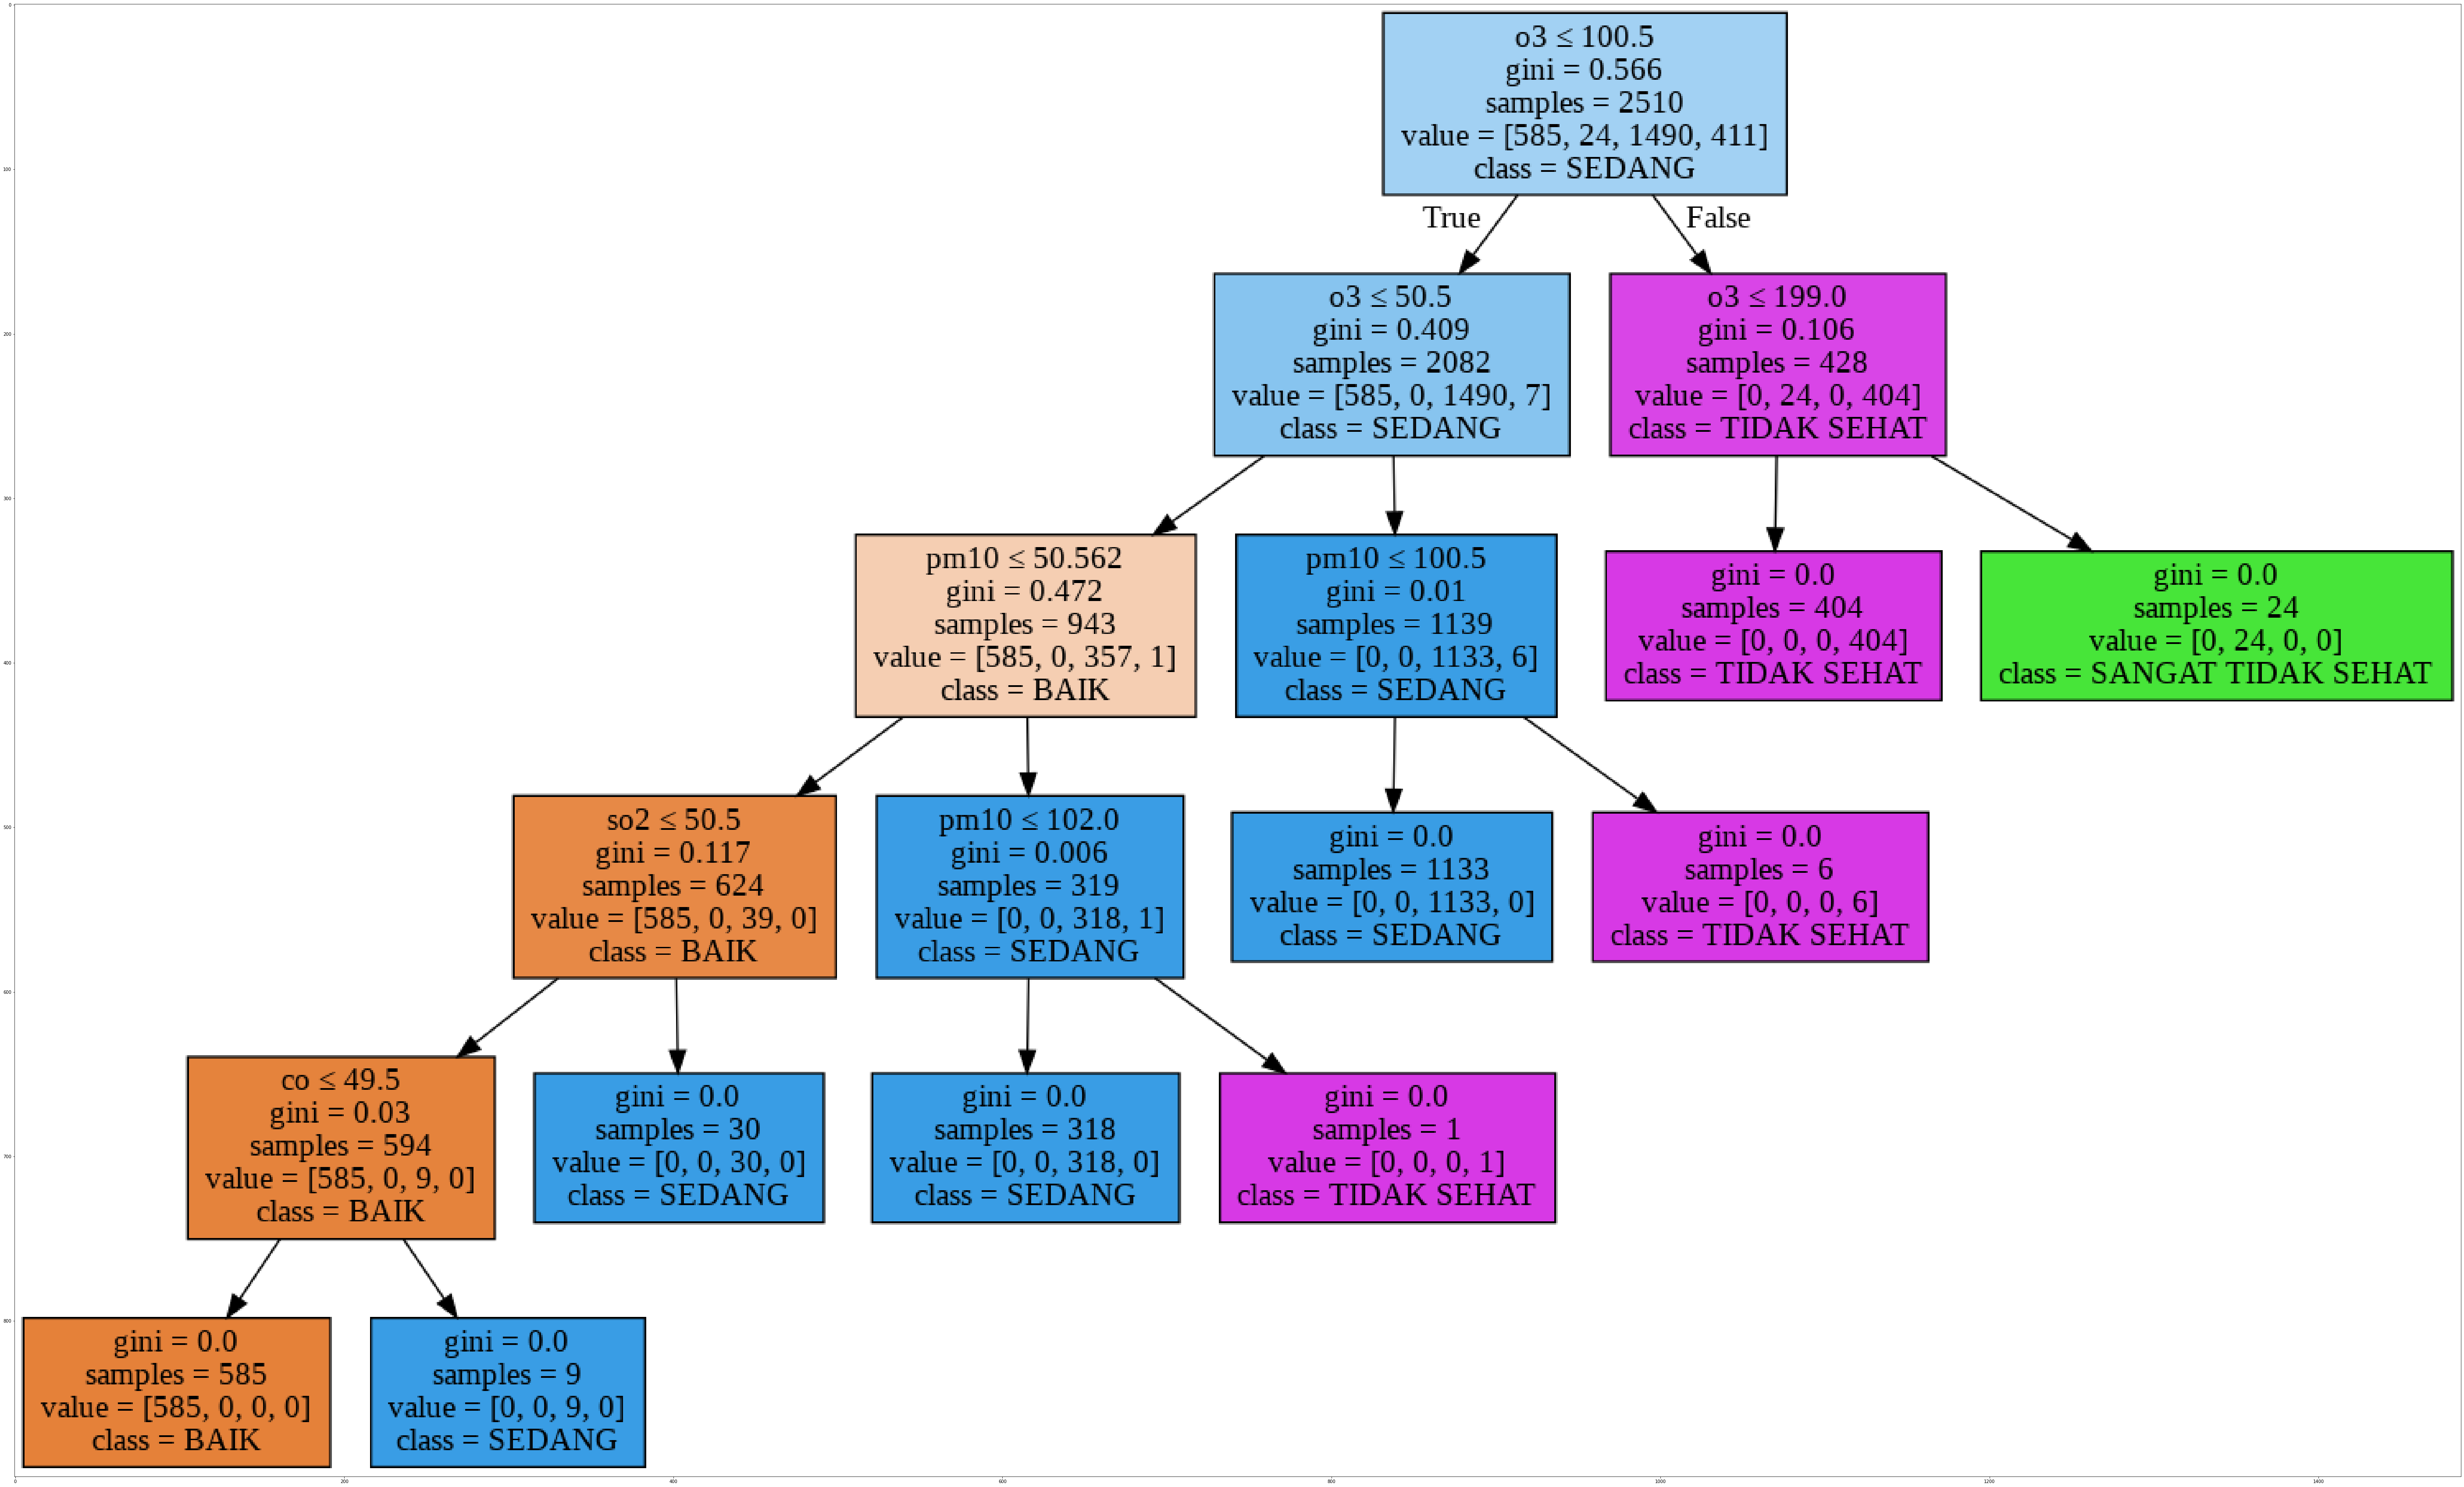

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["kategori"].unique().tolist()
out=tree.export_graphviz(kategoriTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')